In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#constants
Re = 3750
Pr = 1.0
PrT = 0.9


In [631]:
#constant density cases
df_sst_cd_matl = pd.read_csv('validation_data/matlab_code/sst_consd_cpr.csv',sep=',')
df_mk_cd_matl = pd.read_csv('validation_data/matlab_code/mk_consd_cpr.csv',sep=',')
df_v2f_cd_matl = pd.read_csv('validation_data/matlab_code/v2f_consd_cpr.csv',sep=',')

#heated wall cases without correction
df_mk_vd_nc_matl = pd.read_csv('../../RANS_Channel/mk_vard_nocor.csv',sep=',')

#heated wall cases without correction
# df_mk_vard_matl = pd.read_csv('validation_data/matlab_code/sst_consd.csv',sep=',')
# df_mk_vard_matl = pd.read_csv('validation_data/matlab_code/sst_consd.csv',sep=',')



In [632]:
df_mk_cd_fortran = pd.read_fwf('../channel/Inflow_MK_IF_00180.csv',widths=21*[20]) #the complete fi?eld
df_sst_cd_fortran = pd.read_fwf('../channel/Inflow_SST_IF_00180.csv',widths=21*[20]) #the complete fi?eld
df_v2f_cd_fortran = pd.read_fwf('../channel/Inflow_VF_IF_00180.csv',widths=21*[20]) #the complete fi?eld

df_mk_vd_nc_fortran = pd.read_fwf('../channel/Inflow_MK_cPr_00180.csv',widths=21*[20]) #the complete fi?eld
df_v2f_vd_nc_fortran = pd.read_fwf('../channel/Inflow_VF_cPr_03750.csv',widths=21*[20]) #the complete fi?eld



# SST

In [278]:
def plot_sst(df_sst_matl, df_sst_fortran):
    fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,5) )
    plt.subplots_adjust(wspace = .4)

    df_sst_matl.iloc[::4].plot('y','u',ax=ax,color='k',linestyle="None", marker='.',label=r'$u$ matlab')
    df_sst_fortran.plot('y','w',ax=ax,label=r'$u$ fortran')

    ax4 = ax.twinx()
    df_sst_matl.iloc[::4].plot('y','mut',ax=ax4,color='k',linestyle="None", marker='x',label=r'$\mu_t$ matlab')
    df_sst_fortran.plot('y','mut',ax=ax4,label=r'$\mu_t$ fortran',color='r')

    ax.set_xbound(0,1)
    ax.set_xlabel(r'$y$',fontsize=14)
    ax.set_ylabel(r'$u$',rotation=0, labelpad=10,fontsize=14)
    ax4.set_ylabel(r'$\mu_t$',rotation=0, labelpad=10,fontsize=14)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax4.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc=4)
    ax4.get_legend().remove()

    ax3 = ax2.twinx()
    df_sst_matl.iloc[::2].plot('y','k',ax=ax2,color='k',linestyle="None", marker='.',label=r'$k$ matlab')
    df_sst_fortran.plot('y','k',ax=ax2,label=r'$\k$ fortran')
    df_sst_matl.iloc[::2].plot('y','om',ax=ax3,color='k',linestyle="None", marker='x',label=r'$\omega$ matlab')
    df_sst_fortran.plot('y','om',ax=ax3,label=r'$\epsilon$ fortran',color='r')

    ax3.set_ybound(0,200)
    ax3.set_ylabel(r'$\omega$',rotation=0,fontsize=14,labelpad=10)
    ax2.set_xbound(0,1)
    ax2.set_ylabel(r'$k$',fontsize=14,rotation=0, labelpad=10)
    ax2.set_xlabel(r'$y$',fontsize=14)
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=1)
    ax3.get_legend().remove()

    return fig, ax

## Constant Density

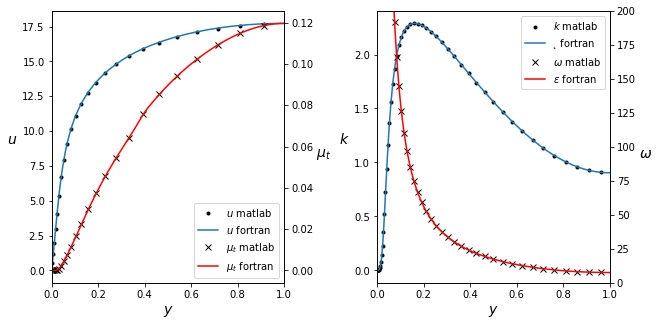

In [290]:
fig, ax =plot_sst(df_sst_cd_matl,df_sst_cd_fortran)

# Myong and Kasagi

In [13]:
def plot_mk(df_mk_matlab, df_mk_fortran, half=True):
    fig, (ax,ax2,ax11) = plt.subplots(1,3,figsize=(10,5) )
    plt.subplots_adjust(wspace = .4)

    df_mk_matlab.iloc[::4].plot('y','u',ax=ax,color='k',linestyle="None", marker='.',label=r'$u$ matlab')
    df_mk_fortran.plot('y','w',ax=ax,label=r'$u$ fortran')

    ax4 = ax.twinx()
    df_mk_matlab.iloc[::4].plot('y','mut',ax=ax4,color='k',linestyle="None", marker='x',label=r'$\mu_t$ matlab')
    df_mk_fortran.plot('y','mut',ax=ax4,label=r'$\mu_t$ fortran',color='r')
    ax.set_xlabel(r'$y$',fontsize=14)
    ax.set_ylabel(r'$u$',rotation=0, labelpad=10,fontsize=14)
    ax4.set_ylabel(r'$\mu_t$',rotation=0, labelpad=10,fontsize=14)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax4.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc=4)
    ax4.get_legend().remove()
    if half:
        ax.set_xbound(0,1)

    ax3 = ax2.twinx()
    df_mk_matlab.iloc[::2].plot('y','k',ax=ax2,color='k',linestyle="None", marker='.',label=r'$k$ matlab')
    df_mk_fortran.plot('y','k',ax=ax2,label=r'$k$ fortran')

    df_mk_matlab.iloc[::2].plot('y','eps',ax=ax3,color='k',linestyle="None", marker='x',label=r'$\epsilon$ matlab')
    df_mk_fortran.plot('y','eps',ax=ax3,label=r'$\epsilon$ fortran',color='r')

    # ax3.set_ybound(0,200)
    ax3.set_ylabel(r'$\epsilon$',rotation=0,fontsize=14,labelpad=10)
    ax2.set_ylabel(r'$k$',fontsize=14,rotation=0, labelpad=10)
    ax2.set_xlabel(r'$y$',fontsize=14)
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=1)
    ax3.get_legend().remove()
    if half:
        ax2.set_xbound(0,1)

    ax21 = ax11.twinx()
    df_mk_matlab[::4].plot('y','T',ax=ax11, label='$T$ matlab',linestyle="None", marker='o', color='k')
    df_mk_fortran.plot('y','T',ax=ax11, label='$T$ fortran')
    df_mk_matlab['rho']=1.5/(df_mk_matlab['T']+1.5)
    df_mk_matlab['alphat_correct']=df_mk_matlab['alphat']/df_mk_matlab['rho']
    df_mk_matlab[::4].plot('y','alphat_correct',ax=ax21, label=r'$\alpha_t$ matlab',linestyle="None", marker='x', color='k')
    df_mk_fortran.plot('y','alphat',ax=ax21, label=r'$\alpha_t$ fortran',color='r')
    ax11.set_ylabel(r'$T$',fontsize=14,rotation=0, labelpad=10)
    ax11.set_xlabel(r'$y$',fontsize=14, labelpad=10)
    ax21.set_ylabel(r'$\alpha_t$',fontsize=14, rotation=0,labelpad=10)
    lines, labels = ax11.get_legend_handles_labels()
    lines2, labels2 = ax21.get_legend_handles_labels()
    ax11.legend(lines + lines2, labels + labels2, loc='best')
    ax21.get_legend().remove()
    if half:
        ax11.set_xbound(0,1)

    return fig,(ax,ax2,ax11)

## Constant Turbulent Prandtl 

### No correction

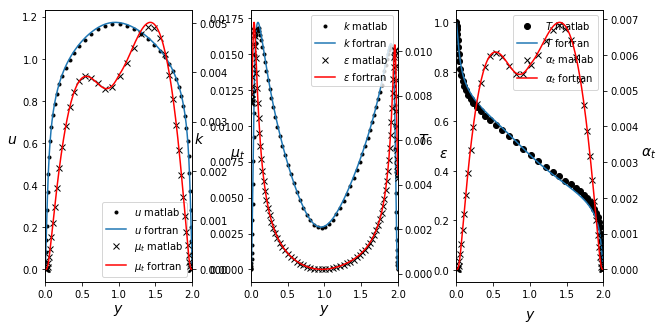

In [16]:
df_mk_vd_nc_cPr_fortran = pd.read_fwf('../channel/Inflow_MK_cPr_mod0_IG_03750.csv',widths=21*[20]) #the complete fi?eld
df_mk_vd_nc_cPr_matl = pd.read_csv('validation_data/matlab_code/mk_vard_cpr_nocor.csv',sep=',')
fig, (ax1,ax2,ax3) = plot_mk(df_mk_vd_nc_cPr_matl, df_mk_vd_nc_cPr_fortran, half=False)

### Otero et al.

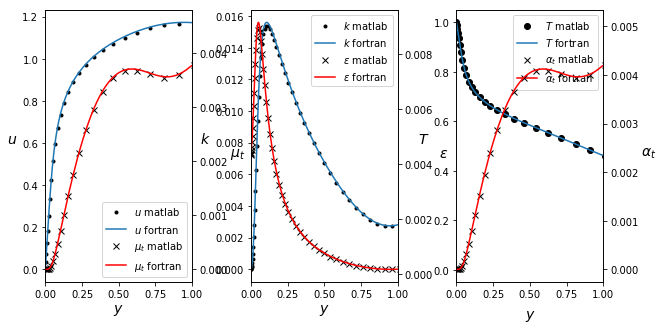

In [1445]:
df_mk_vd_otero_cPr_fortran = pd.read_fwf('../channel/Inflow_MK_cPr_mod1_03750.csv',widths=21*[20]) #the complete fi?eld
df_mk_vd_otero_cPr_matl = pd.read_csv('validation_data/matlab_code/mk_vard_cpr_otero.csv',sep=',')
fig, (ax1,ax2,ax3) = plot_mk(df_mk_vd_otero_cPr_matl, df_mk_vd_otero_cPr_fortran)

### Aupoix et al.

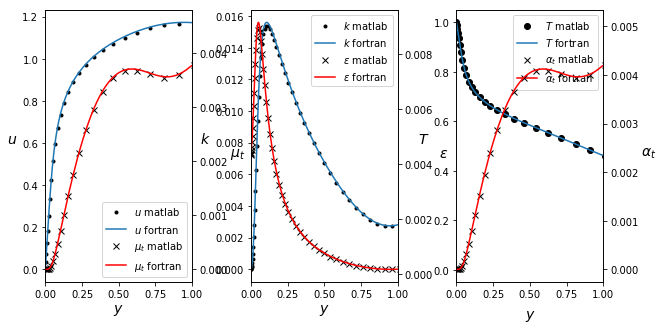

In [1457]:
df_mk_vd_aupoix_cPr_fortran = pd.read_fwf('../channel/Inflow_MK_cPr_mod2_03750.csv',widths=21*[20]) #the complete fi?eld
df_mk_vd_aupoix_cPr_matl = pd.read_csv('validation_data/matlab_code/mk_vard_cpr_aupoix.csv',sep=',')
fig, (ax1,ax2,ax3) = plot_mk(df_mk_vd_otero_cPr_matl, df_mk_vd_otero_cPr_fortran)

### DWX

#### Constant Properties

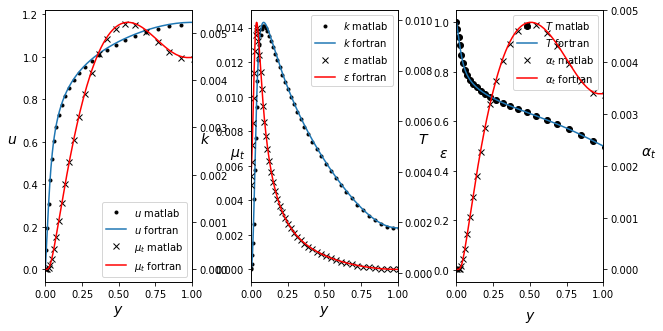

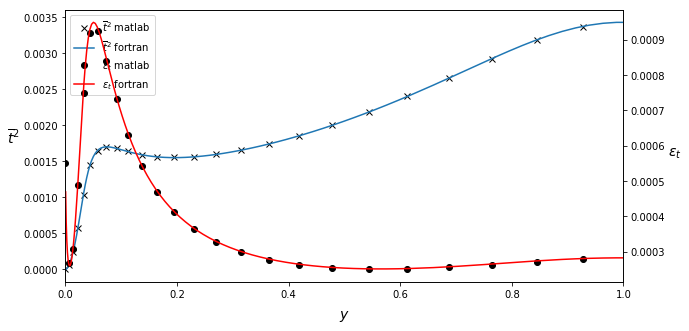

In [1778]:
df_mk_cd_DWX_fortran = pd.read_fwf('../channel/Inflow_MK_DWX_mod0_cprop_03750.csv',widths=21*[20]) #the complete fi?eld
df_mk_cd_DWX_matl = pd.read_csv('validation_data/matlab_code/mk_consd_DWX.csv',sep=',')
fig, (ax1,ax2,ax3) = plot_mk(df_mk_cd_DWX_matl, df_mk_cd_DWX_fortran)
fig, ax =plt.subplots(figsize=(10,5))
df_mk_cd_DWX_matl[::4].plot('y','kt',ax=ax, label='$\overline{t}^2$ matlab',linestyle="None", marker='x', color='k')
df_mk_cd_DWX_fortran.plot('y','kt',ax=ax, label='$\overline{t}^2$ fortran')
ax2 = ax.twinx()
df_mk_cd_DWX_matl[::4].plot('y','epst',ax=ax2, label='$\epsilon_t$ matlab',linestyle="None", marker='o', color='k')
df_mk_cd_DWX_fortran.plot('y','epst',ax=ax2,label='$\epsilon_t$ fortran',color='r')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()
ax.set_ylabel(r'$\overline{t}^2$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\epsilon_t$',fontsize=14, rotation=0,labelpad=10)
ax.set_xbound(0,1)


#### Variable Properties

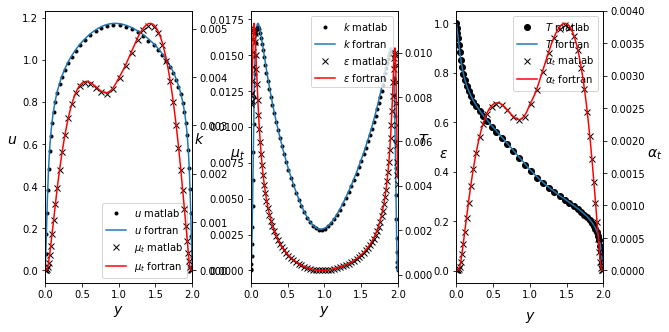

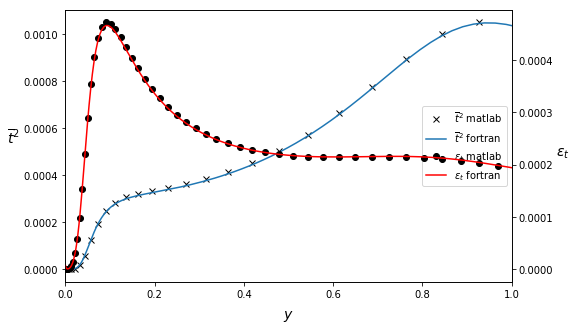

In [1837]:
df_mk_vd_nc_DWX_fortran = pd.read_fwf('../channel/Inflow_MK_DWX_mod0_IG_03750.csv',widths=21*[20]) #the complete fi?eld
df_mk_vd_nc_DWX_matl = pd.read_csv('validation_data/matlab_code/mk_vard_DWX_nocor.csv',sep=',')
fig, (ax1,ax2,ax3) = plot_mk(df_mk_vd_nc_DWX_matl, df_mk_vd_nc_DWX_fortran,half=False)
fig, ax =plt.subplots(figsize=(8,5))
df_mk_vd_nc_DWX_matl['rho']=1.5/(df_mk_vd_nc_DWX_matl['T']+1.5)
df_mk_vd_nc_DWX_matl['epstrho']=df_mk_vd_nc_DWX_matl['epst']/df_mk_vd_nc_DWX_matl['rho']
df_mk_vd_nc_DWX_matl['ktrho']=df_mk_vd_nc_DWX_matl['kt']/df_mk_vd_nc_DWX_matl['rho']

df_mk_vd_nc_DWX_matl[::4].plot('y','kt',ax=ax, label='$\overline{t}^2$ matlab',linestyle="None", marker='x', color='k')
df_mk_vd_nc_DWX_fortran.plot('y','kt',ax=ax, label='$\overline{t}^2$ fortran')
ax2 = ax.twinx()

df_mk_vd_nc_DWX_matl[::2].plot('y','epst',ax=ax2, label='$\epsilon_t$ matlab',linestyle="None", marker='o', color='k')
df_mk_vd_nc_DWX_fortran.plot('y','epst',ax=ax2,label='$\epsilon_t$ fortran',color='r')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='center right')
ax2.get_legend().remove()
ax.set_ylabel(r'$\overline{t}^2$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\epsilon_t$',fontsize=14, rotation=0,labelpad=10)
ax.set_xbound(0,1)


# Spalart Almaras

In [868]:
def plot_sa(df_sa_matlab, df_sa_fortran):

    fig, (ax,ax2,ax11) = plt.subplots(1,3,figsize=(20,5) )
    plt.subplots_adjust(wspace = .4)

    df_sa_matlab.iloc[::2].plot('y','u',ax=ax,color='k',linestyle="None", marker='.',label=r'$u$ matlab')
    df_sa_fortran.plot('y','w',ax=ax,label=r'$u$ fortran')

    ax4 = ax.twinx()
    df_sa_matlab.iloc[::2].plot('y','mut',ax=ax4,color='k',linestyle="None", marker='x',label=r'$\mu_t$ matlab')
    df_sa_fortran.plot('y','mut',ax=ax4,label=r'$\mu_t$ fortran',color='r')
    ax.set_xlabel(r'$y$',fontsize=14)
    ax.set_ylabel(r'$u$',rotation=0, labelpad=10,fontsize=14)
    ax4.set_ylabel(r'$\mu_t$',rotation=0, labelpad=10,fontsize=14)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax4.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc=4)
    ax4.get_legend().remove()
    
    ax3 = ax2.twinx()
    df_sa_matlab.iloc[::2].plot('y','nuSA',ax=ax2,color='k',linestyle="None", marker='.',label=r'$\nu_{SA}$ matlab')
    df_sa_fortran.plot('y','nuSA',ax=ax2,label=r'$\nu_{SA}$ fortran')
    ax2.set_ylabel(r'$\nu_{SA}$',fontsize=14,rotation=0, labelpad=10)
    ax2.set_xlabel(r'$y$',fontsize=14)
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=4)
    
    ax21 = ax11.twinx()
    df_sa_matlab[::4].plot('y','T',ax=ax11, label='$T$ matlab',linestyle="None", marker='o', color='k')
    df_sa_fortran.plot('y','T',ax=ax11, label='$T$ fortran')
    df_sa_matlab[::4].plot('y','alphat',ax=ax21, label=r'$\alpha_t$ matlab',linestyle="None", marker='x', color='k')
    df_sa_fortran.plot('y','alphat',ax=ax21, label=r'$\alpha_t$ fortran',color='r')
    ax11.set_ylabel(r'$T$',fontsize=14,rotation=0, labelpad=10)
    ax11.set_xlabel(r'$y$',fontsize=14, labelpad=10)
    ax21.set_ylabel(r'$\alpha_t$',fontsize=14, rotation=0,labelpad=10)
    lines, labels = ax11.get_legend_handles_labels()
    lines2, labels2 = ax21.get_legend_handles_labels()
    ax11.legend(lines + lines2, labels + labels2, loc='best')
    ax21.get_legend().remove()
    return fig,(ax1,ax2,ax11)

In [869]:
#without correction
df_sa_vd_nc_cPr_fortran = pd.read_fwf('../channel/Inflow_SA_cPr_mod0_03750.csv',widths=21*[20]) #the complete fi?eld
df_sa_vd_nc_cPr_matl = pd.read_csv('validation_data/matlab_code/sa_vard_cpr_nocor.csv',sep=',')
#with otero correction
df_sa_vd_otero_cPr_fortran = pd.read_fwf('../channel/Inflow_SA_cPr_mod1_03750.csv',widths=21*[20]) #the complete fi?eld
df_sa_vd_otero_cPr_matl = pd.read_csv('validation_data/matlab_code/sa_vard_cpr_otero.csv',sep=',')

## Variable Density (No corrections)

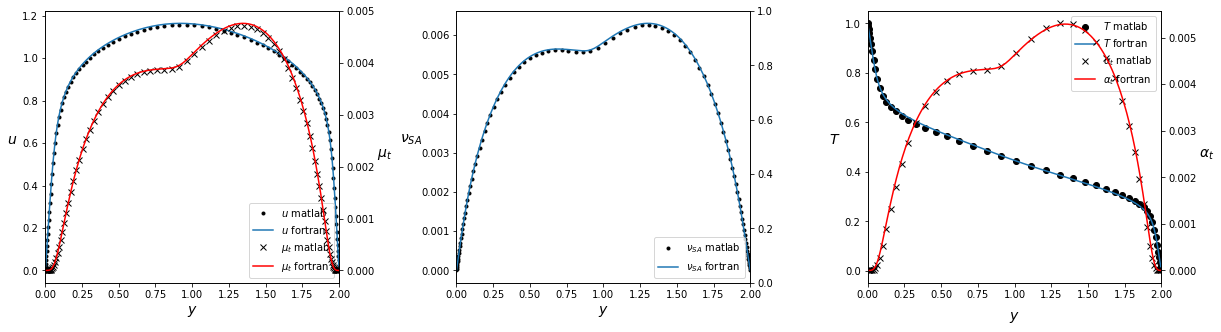

In [870]:
# fig, ax = plot_sa(df_sa_cd_matl, df_sa_cd_fortran)
fig, (ax1,ax2,ax3) = plot_sa(df_sa_vd_nc_matl, df_sa_vd_nc_cPr_fortran)
# fig, ax =plt.subplots(figsize=(10,5))


## Variable Density (Otero corrections)

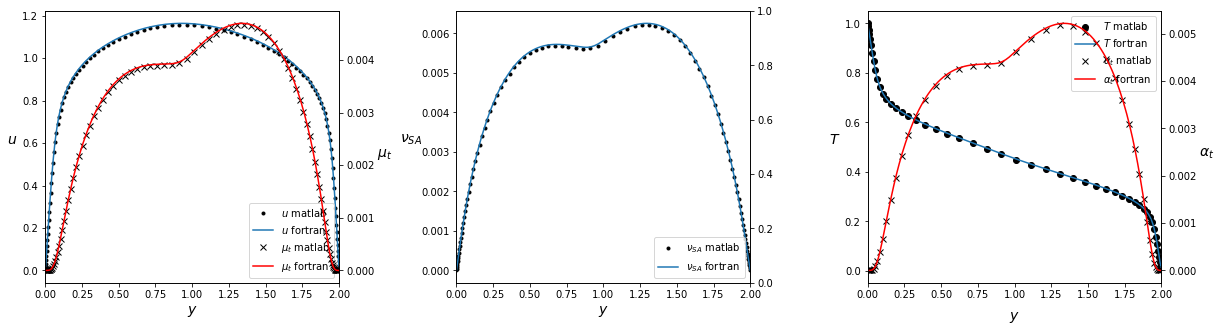

In [871]:
fig, (ax1,ax2,ax3) = plot_sa(df_sa_vd_otero_cPr_matl, df_sa_vd_otero_cPr_fortran)


# V2F

In [18]:
def plot_v2f(df_v2f_matlab, df_v2f_fortran):

    fig, (ax,ax2,ax5) = plt.subplots(1,3,figsize=(15,5) )
    plt.subplots_adjust(wspace = .4)

    df_v2f_matlab.iloc[::4].plot('y','u',ax=ax,color='k',linestyle="None", marker='.',label=r'$u$ matlab')
    df_v2f_fortran.plot('y','w',ax=ax,label=r'$u$ fortran')

    ax4 = ax.twinx()
    df_v2f_matlab.iloc[::4].plot('y','mut',ax=ax4,color='k',linestyle="None", marker='x',label=r'$\mu_t$ matlab')
    df_v2f_fortran.plot('y','mut',ax=ax4,label=r'$\mu_t$ fortran',color='r')
    ax.set_xbound(0,1)
    ax.set_xlabel(r'$y$',fontsize=14)
    ax.set_ylabel(r'$u$',rotation=0, labelpad=10,fontsize=14)
    ax4.set_ylabel(r'$\mu_t$',rotation=0, labelpad=10,fontsize=14)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax4.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc=4)
    ax4.get_legend().remove()

    ax3 = ax2.twinx()
    df_v2f_matlab.iloc[::2].plot('y','k',ax=ax2,color='k',linestyle="None", marker='.',label=r'$k$ matlab')
    df_v2f_fortran.plot('y','k',ax=ax2,label=r'$k$ fortran')

    df_v2f_matlab.iloc[::2].plot('y','eps',ax=ax3,color='k',linestyle="None", marker='x',label=r'$\epsilon$ matlab')
    df_v2f_fortran.plot('y','eps',ax=ax3,label=r'$\epsilon$ fortran',color='r')

    # ax3.set_ybound(0,200)
    ax3.set_ylabel(r'$\epsilon$',rotation=0,fontsize=14,labelpad=10)
    ax2.set_xbound(0,1)
    ax2.set_ylabel(r'$k$',fontsize=14,rotation=0, labelpad=10)
    ax2.set_xlabel(r'$y$',fontsize=14)
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=1)
    ax3.get_legend().remove()

    df_v2f_matlab.iloc[::4].plot('y','v2',ax=ax5,color='k',linestyle="None", marker='.',label=r'$\overline{v}^2$ matlab')
    df_v2f_fortran.plot('y','v2',ax=ax5,label=r'$\overline{v}^2$ fortran')
    ax6=ax5.twinx()
    df_v2f_matlab.iloc[::4].plot('y','fv2',ax=ax6,color='k',linestyle="None", marker='x',label=r'$f$ matlab')
    df_v2f_fortran.plot('y','bF2',ax=ax5,label=r'$f$ fortran',color='r')
    ax5.set_ylabel(r'$\overline{v}^2$',fontsize=14,rotation=0, labelpad=10)
    ax5.set_xlabel(r'$y$',fontsize=14, labelpad=10)
    ax6.set_ylabel(r'$f$',fontsize=14, rotation=0,labelpad=10)
    ax5.set_xbound(0,1)

    lines, labels = ax5.get_legend_handles_labels()
    lines2, labels2 = ax6.get_legend_handles_labels()
    ax5.legend(lines + lines2, labels + labels2, loc='best')
    ax6.get_legend().remove()
    return fig,ax


## Constant Density

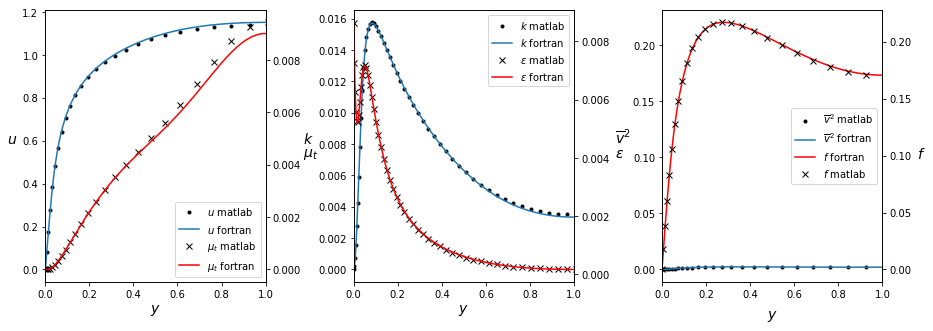

In [69]:
df_v2f_cd_DWX_matl = pd.read_csv("validation_data/matlab_code/v2f_consd_DWX.csv",sep=',')
df_v2f_cd_DWX_fortran = pd.read_fwf('../channel/Inflow_VF_DWX_mod0_cprop_03750.csv',widths=21*[20]) #the complete fi?eld
fig, ax = plot_v2f(df_v2f_cd_DWX_matl, df_v2f_cd_DWX_fortran)

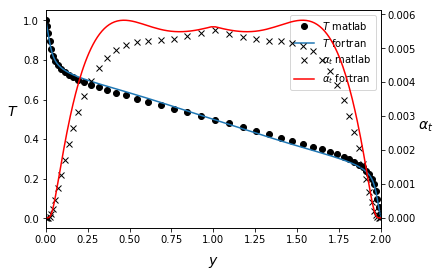

In [70]:
fig, ax11 = plt.subplots()
ax21 = ax11.twinx()
df_v2f_cd_DWX_matl[::4].plot('y','T',ax=ax11, label='$T$ matlab',linestyle="None", marker='o', color='k')
df_v2f_cd_DWX_fortran.plot('y','T',ax=ax11, label='$T$ fortran')
df_v2f_cd_DWX_matl[::4].plot('y','alphat',ax=ax21, label=r'$\alpha_t$ matlab',linestyle="None", marker='x', color='k')
df_v2f_cd_DWX_fortran.plot('y','alphat',ax=ax21, label=r'$\alpha_t$ fortran',color='r')
ax11.set_ylabel(r'$T$',fontsize=14,rotation=0, labelpad=10)
ax11.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax21.set_ylabel(r'$\alpha_t$',fontsize=14, rotation=0,labelpad=10)
lines, labels = ax11.get_legend_handles_labels()
lines2, labels2 = ax21.get_legend_handles_labels()
ax11.legend(lines + lines2, labels + labels2, loc='best')
ax21.get_legend().remove()
df_v2f_cd_DWX_matl.plot(x='y',y='T',ax=ax)
df_v2f_cd_DWX_fortran.plot(x='y',y='T',ax=ax)

Text(0, 0.5, '$\\epsilon_t$')

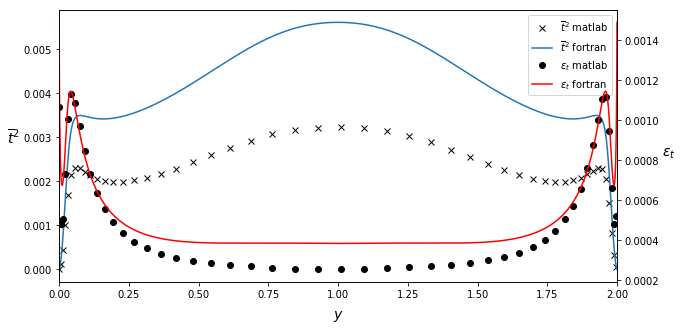

In [71]:
fig, ax =plt.subplots(figsize=(10,5))
df_v2f_cd_DWX_matl[::4].plot('y','kt',ax=ax, label='$\overline{t}^2$ matlab',linestyle="None", marker='x', color='k')
df_v2f_cd_DWX_fortran.plot('y','kt',ax=ax, label='$\overline{t}^2$ fortran')
ax2 = ax.twinx()
df_v2f_cd_DWX_matl[::4].plot('y','epst',ax=ax2, label='$\epsilon_t$ matlab',linestyle="None", marker='o', color='k')
df_v2f_cd_DWX_fortran.plot('y','epst',ax=ax2,label='$\epsilon_t$ fortran',color='r')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()
ax.set_ylabel(r'$\overline{t}^2$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\epsilon_t$',fontsize=14, rotation=0,labelpad=10)

## Variable Density

### Constant Turbulent Prandtl

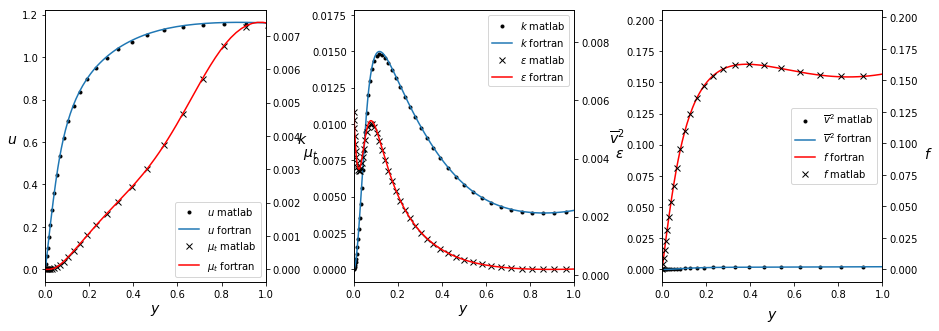

In [2355]:
df_v2f_vd_nc_cpr_matl = pd.read_csv('validation_data/matlab_code/v2f_vard_cpr_nocor.csv',sep=',')
df_v2f_vd_nc_cpr_fortran = pd.read_fwf('../channel/Inflow_VF_cPr_mod0_IG_03750.csv',widths=21*[20]) #the complete fi?eld
fig, ax = plot_v2f(df_v2f_vd_nc_matl, df_v2f_vd_nc_cpr_fortran)


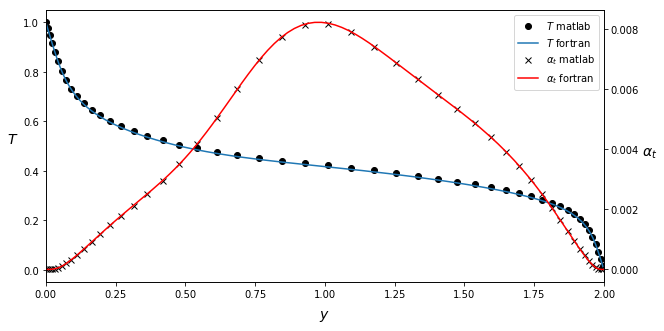

In [2359]:
fig, ax =plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
df_v2f_vd_nc_cpr_fortran['alphat_scaled'] =df_v2f_vd_nc_cpr_fortran['alphat']*df_v2f_vd_nc_cpr_fortran['rho'] 
df_v2f_vd_nc_cpr_matl[::4].plot('y','T',ax=ax, label='$T$ matlab',linestyle="None", marker='o', color='k')
df_v2f_vd_nc_cpr_fortran.plot('y','T',ax=ax, label='$T$ fortran')
df_v2f_vd_nc_cpr_matl[::4].plot('y','alphat',ax=ax2, label=r'$\alpha_t$ matlab',linestyle="None", marker='x', color='k')
df_v2f_vd_nc_cpr_fortran.plot('y','alphat_scaled',ax=ax2, label=r'$\alpha_t$ fortran',color='r')
ax.set_ylabel(r'$T$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\alpha_t$',fontsize=14, rotation=0,labelpad=10)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()

### DWX

### No corrections

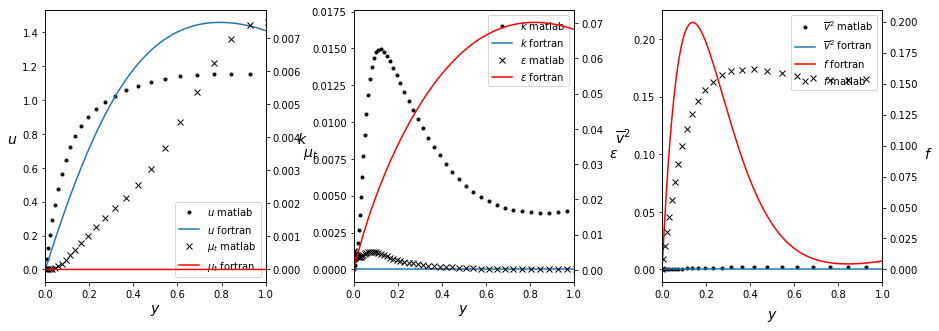

In [22]:
df_v2f_vd_nc_dwx_matl = pd.read_csv('validation_data/matlab_code/v2f_vard_DWX_nocor.csv',sep=',')
df_v2f_vd_nc_dwx_fortran = pd.read_fwf('../channel/Inflow_VF_DWX_mod0_IG_03750.csv',widths=21*[20]) 
fig, ax = plot_v2f(df_v2f_vd_nc_dwx_matl, df_v2f_vd_nc_dwx_fortran)


Text(0, 0.5, '$\\epsilon_t$')

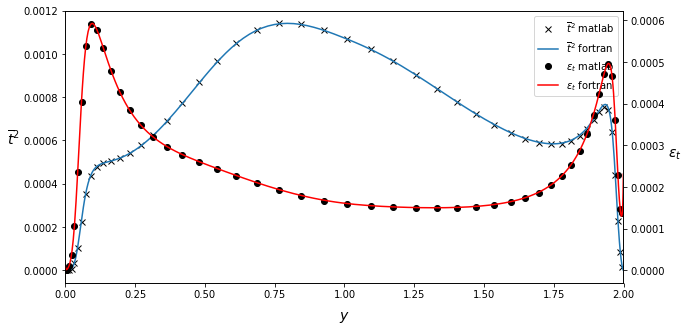

In [2381]:
fig, ax =plt.subplots(figsize=(10,5))
df_v2f_vd_nc_dwx_matl[::4].plot('y','kt',ax=ax, label='$\overline{t}^2$ matlab',linestyle="None", marker='x', color='k')
df_v2f_vd_nc_dwx_fortran.plot('y','kt',ax=ax, label='$\overline{t}^2$ fortran')
ax2 = ax.twinx()
df_v2f_vd_nc_dwx_matl[::4].plot('y','epst',ax=ax2, label='$\epsilon_t$ matlab',linestyle="None", marker='o', color='k')
df_v2f_vd_nc_dwx_fortran.plot('y','epst',ax=ax2,label='$\epsilon_t$ fortran',color='r')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()
ax.set_ylabel(r'$\overline{t}^2$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\epsilon_t$',fontsize=14, rotation=0,labelpad=10)

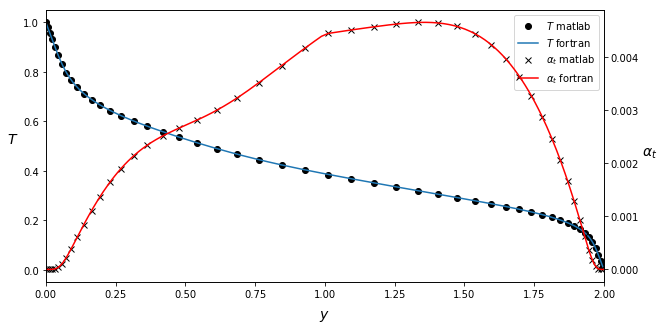

In [2382]:
fig, ax =plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
df_v2f_vd_nc_dwx_fortran['alphat_scaled'] =df_v2f_vd_nc_cpr_fortran['alphat']*df_v2f_vd_nc_cpr_fortran['rho'] 
df_v2f_vd_nc_dwx_matl[::4].plot('y','T',ax=ax, label='$T$ matlab',linestyle="None", marker='o', color='k')
df_v2f_vd_nc_dwx_fortran.plot('y','T',ax=ax, label='$T$ fortran')
df_v2f_vd_nc_dwx_matl[::4].plot('y','alphat',ax=ax2, label=r'$\alpha_t$ matlab',linestyle="None", marker='x', color='k')
df_v2f_vd_nc_dwx_fortran.plot('y','alphat',ax=ax2, label=r'$\alpha_t$ fortran',color='r')
ax.set_ylabel(r'$T$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\alpha_t$',fontsize=14, rotation=0,labelpad=10)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()

### Otero

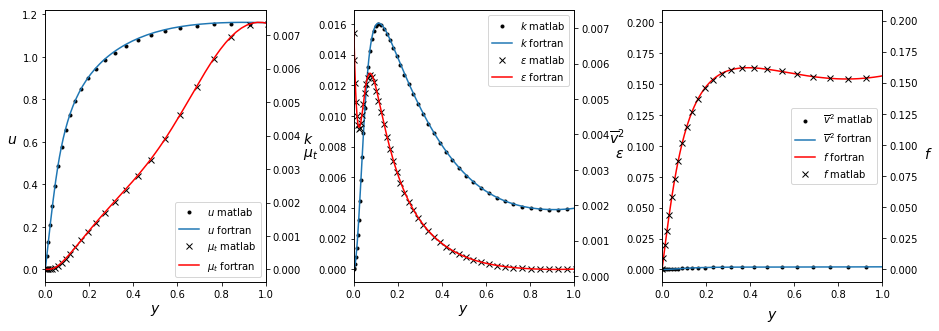

In [2383]:
df_v2f_vd_otero_dwx_matl = pd.read_csv('validation_data/matlab_code/v2f_vard_DWX_otero.csv',sep=',')
df_v2f_vd_otero_dwx_fortran = pd.read_fwf('../channel/Inflow_VF_DWX_mod1_IG_03750.csv',widths=21*[20]) 
fig, ax = plot_v2f(df_v2f_vd_otero_dwx_matl, df_v2f_vd_otero_dwx_fortran)


Text(0, 0.5, '$\\epsilon_t$')

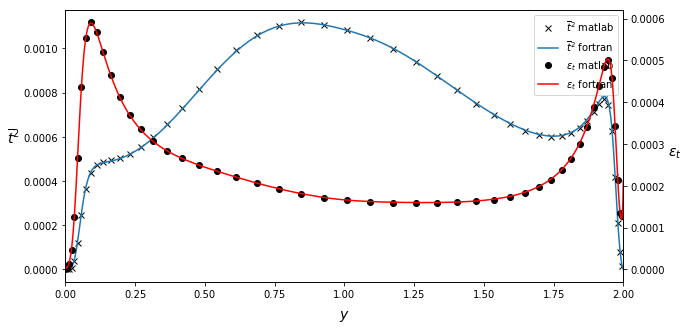

In [2384]:
fig, ax =plt.subplots(figsize=(10,5))
df_v2f_vd_otero_dwx_matl[::4].plot('y','kt',ax=ax, label='$\overline{t}^2$ matlab',linestyle="None", marker='x', color='k')
df_v2f_vd_otero_dwx_fortran.plot('y','kt',ax=ax, label='$\overline{t}^2$ fortran')
ax2 = ax.twinx()
df_v2f_vd_otero_dwx_matl[::4].plot('y','epst',ax=ax2, label='$\epsilon_t$ matlab',linestyle="None", marker='o', color='k')
df_v2f_vd_otero_dwx_fortran.plot('y','epst',ax=ax2,label='$\epsilon_t$ fortran',color='r')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()
ax.set_ylabel(r'$\overline{t}^2$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\epsilon_t$',fontsize=14, rotation=0,labelpad=10)

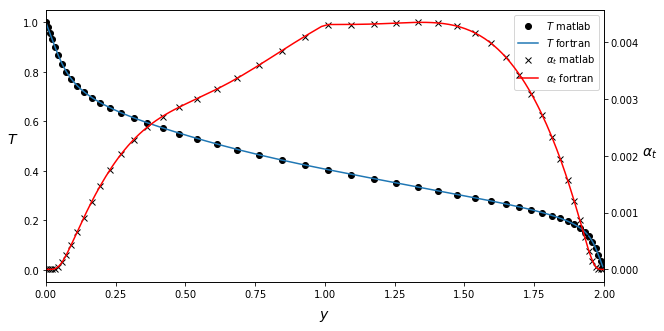

In [2385]:
fig, ax =plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
df_v2f_vd_otero_dwx_fortran['alphat_scaled'] =df_v2f_vd_nc_cpr_fortran['alphat']*df_v2f_vd_nc_cpr_fortran['rho'] 
df_v2f_vd_otero_dwx_matl[::4].plot('y','T',ax=ax, label='$T$ matlab',linestyle="None", marker='o', color='k')
df_v2f_vd_otero_dwx_fortran.plot('y','T',ax=ax, label='$T$ fortran')
df_v2f_vd_otero_dwx_matl[::4].plot('y','alphat',ax=ax2, label=r'$\alpha_t$ matlab',linestyle="None", marker='x', color='k')
df_v2f_vd_otero_dwx_fortran.plot('y','alphat',ax=ax2, label=r'$\alpha_t$ fortran',color='r')
ax.set_ylabel(r'$T$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\alpha_t$',fontsize=14, rotation=0,labelpad=10)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()

### Aupoix

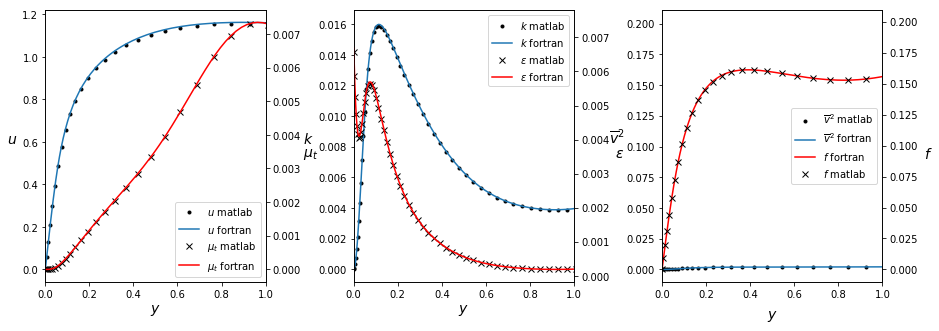

In [2386]:
df_v2f_vd_aupoix_dwx_matl = pd.read_csv('validation_data/matlab_code/v2f_vard_DWX_aupoix.csv',sep=',')
df_v2f_vd_aupoix_dwx_fortran = pd.read_fwf('../channel/Inflow_VF_DWX_mod2_IG_03750.csv',widths=21*[20]) 
fig, ax = plot_v2f(df_v2f_vd_aupoix_dwx_matl, df_v2f_vd_aupoix_dwx_fortran)


Text(0, 0.5, '$\\epsilon_t$')

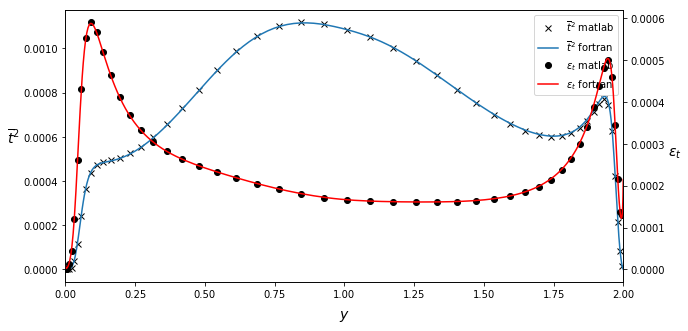

In [2378]:
fig, ax =plt.subplots(figsize=(10,5))
df_v2f_vd_aupoix_dwx_matl[::4].plot('y','kt',ax=ax, label='$\overline{t}^2$ matlab',linestyle="None", marker='x', color='k')
df_v2f_vd_aupoix_dwx_fortran.plot('y','kt',ax=ax, label='$\overline{t}^2$ fortran')
ax2 = ax.twinx()
df_v2f_vd_aupoix_dwx_matl[::4].plot('y','epst',ax=ax2, label='$\epsilon_t$ matlab',linestyle="None", marker='o', color='k')
df_v2f_vd_aupoix_dwx_fortran.plot('y','epst',ax=ax2,label='$\epsilon_t$ fortran',color='r')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()
ax.set_ylabel(r'$\overline{t}^2$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\epsilon_t$',fontsize=14, rotation=0,labelpad=10)

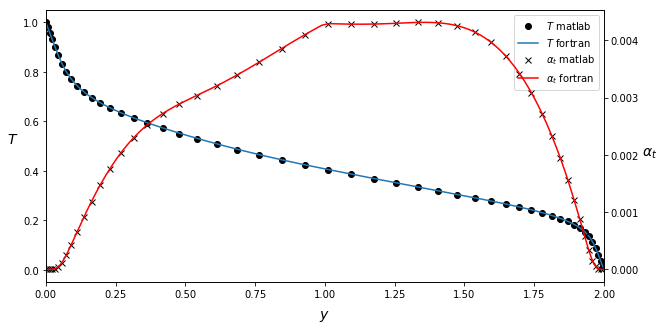

In [2379]:
fig, ax =plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
df_v2f_vd_aupoix_dwx_fortran['alphat_scaled'] =df_v2f_vd_nc_cpr_fortran['alphat']*df_v2f_vd_nc_cpr_fortran['rho'] 
df_v2f_vd_aupoix_dwx_matl[::4].plot('y','T',ax=ax, label='$T$ matlab',linestyle="None", marker='o', color='k')
df_v2f_vd_aupoix_dwx_fortran.plot('y','T',ax=ax, label='$T$ fortran')
df_v2f_vd_aupoix_dwx_matl[::4].plot('y','alphat',ax=ax2, label=r'$\alpha_t$ matlab',linestyle="None", marker='x', color='k')
df_v2f_vd_aupoix_dwx_fortran.plot('y','alphat',ax=ax2, label=r'$\alpha_t$ fortran',color='r')
ax.set_ylabel(r'$T$',fontsize=14,rotation=0, labelpad=10)
ax.set_xlabel(r'$y$',fontsize=14, labelpad=10)
ax2.set_ylabel(r'$\alpha_t$',fontsize=14, rotation=0,labelpad=10)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax2.get_legend().remove()